In [5]:
from __future__ import division
from scipy.integrate import odeint
%pylab inline

Populating the interactive namespace from numpy and matplotlib


For our second example, we're going to look at a problem where regular perturbation fails to give a satisfactory solution.

## Example 3.1.2 Nonlinear oscillations
We consider a modified version of the classic second-order oscillator, modelling a mass on a nonlinear spring
\begin{align}
    m \frac{d^2y}{d\tau^2} &= -ky - ay^3, \quad \tau > 0 \\
    y(0) &= A & \frac{dy}{dt}(0) &= 0
\end{align}
We are considering the case where the nonlinear term is much smaller than the linear term, so we are looking at a perturbed version of the linear problem.

### Rescaling
First, we need to rescale
\begin{equation}
    \begin{aligned}
        [k] &= [M][T]^{-2} & [a] &= [M][L]^{-2}[T]^{-2} & [m] &= [M] & [A] &= [L]
    \end{aligned}
\end{equation}
Obvious choice for $y$ is the initial displacement. Again we look to the linear problem to choose an appropriate timescale. If we neglect this our solution looks like
\begin{equation}
    y(\tau) \sim \cos\left(\sqrt{\frac{k}{m}}\tau + \phi\right)
\end{equation}
So we rescale time by our characteristic time $\sqrt{m/k}$:
\begin{equation}
    \begin{aligned}
        t &= \frac{\tau}{\sqrt{m/k}} & u &= \frac{y}{A}
    \end{aligned}
\end{equation}
Our equation is then
\begin{align}
    \ddot{u} + u + \varepsilon u^3 & = 0 \qquad t > 0 \\
    u(0) &= 1 & \dot{u}(0) &= 0 \\ 
    \varepsilon &= \frac{aA^2}{k} \ll 1
\end{align}
The last expression tells us what is required for the nonlinear term to be truly regarded as smaller than the linear one. This equation is called the Duffing equation.

### Regular perturbation
Let's attempt a regular perturbation solution. We'll make the usual perturbation series approximation
\begin{equation}
    u(t) = u_0(t) + \varepsilon u_1(t) + \varepsilon^2 u_2(t) + \cdots
\end{equation}
This leads to the sequence of equations:
\begin{align}
    \ddot{u}_0 + u_0 &= 0 & u_0(0) &= 1 & \dot{u}_0(0) &= 0 \\
    \ddot{u}_1 + u_1 &= -u_0^3 & u_1(0) &= 0 & \dot{u}_1(0) &= 0\end{align}
The first gives
\begin{equation}
    u_0(t) = \cos t
\end{equation}
And the second then becomes
\begin{equation}
    \ddot{u}_1 + u_1 = -\cos^3 t = -\frac{1}{4}(3 \cos t + \cos 3t)
\end{equation}
Which, after solving becomes
\begin{equation}
    u_1(t) = \frac{1}{32} (\cos 3t - \cos t) - \frac{3}{8} t \sin t
\end{equation}
Giving our first order perturbation approximation as
\begin{equation}
    u_a(t) = \cos t + \varepsilon\left(\frac{1}{32} (\cos 3t - \cos t) - \frac{3}{8} t \sin t\right)
\end{equation}

* Our leading order behaviour is oscillatory (as expected).
* But the correction term is not necessarily small

For fixed $t$, term goes to zero as $\varepsilon \to 0$. But if $t$ is of the order $\varepsilon^{-1}$ or larger, then as $\varepsilon \to 0$, the term $t \sin t$ will be large. This is called a *secular* term.

So the amplitude of the approximate solution will grow with time, and this is certainly not consistent with the physical system. 
* We can't make our correction arbitarily small for $t \in (0, \infty)$ by making $\varepsilon$ small enough
* Additional terms won't help.

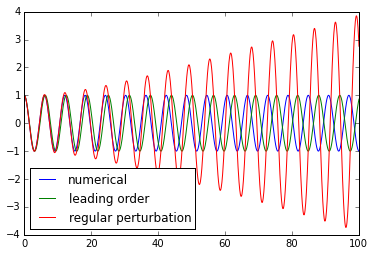

In [18]:
epsilon = 1e-1
t = linspace(0, 100, 1000)
def f(u, t):
    return [u[1], -u[0] - epsilon*u[0]**3]
u0 = [1, 0]
soln = odeint(f, u0, t)

ua0 = cos(t)
ua1 = cos(t) + epsilon*(1/32*(cos(3*t) - cos(t)) - 3/8*t*sin(t))

figure()
ax = gca()
ax.plot(t, soln[:, 0], label='numerical')
ax.plot(t, ua0, label='leading order')
ax.plot(t, ua1, label='regular perturbation')
ax.legend(loc='best')

### The Poincaré-Lindstedt method
